## Imports

In [26]:
import warnings
warnings.filterwarnings("ignore") # Ignore DEAP runtime warnings

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme() # Apply seaborn theme to plots

from deap import tools

from src.data import load_dataset
from src.ga import run_petrinas_ga
from src.utils import save_outputs

## Configuration

In [2]:
N_PLACES = 12
N_TRANSITIONS = 12

WEIGHT = 0.9
TRANSITIONS = [ 
    "Receiving Request", 
    "First Assessment", 
    "Fraud Check",  
    "Invisible 2", 
    "Invisible 1",
    "Accept", 
    "Decline", 
    "Create Offer", 
    "Contact Customer", 
    "Offer Refused", 
    "Draw Contract", 
    "Send Contract", 
]

# Load in dataset
dataset = load_dataset(filepath="data/traces.txt", transitions=TRANSITIONS)

## Exercise 1

In [3]:
outputs_1 = run_petrinas_ga(
    dataset=dataset,
    n_places=N_PLACES,
    n_transitions=N_TRANSITIONS,
    weight=WEIGHT,
    crossover_ops=[
        {"function": tools.cxTwoPoint},
    ],
    mutation_ops=[
        {"function": tools.mutFlipBit, "indpb": 0.1},
    ],
    selection_ops=[
        {"function": tools.selTournament, "tournsize": 5},
    ],
    crossover_probs=[0.5],
    mutation_probs=[0.5],
    n_individuals=500,
    n_generations=50,
    n_iterations=1,
)

save_outputs(outputs_1, "outputs/exercise-1.json")

Crossover op: cxTwoPoint
Mutation op: mutFlipBit
Selection op: selTournament
Crossover prob: 0.5
Mutation prob: 0.5


100%|██████████| 1/1 [00:10<00:00, 10.18s/it]

Best fitness: 537.9000000000001
Average best fitness: 537.9000000000001



### Plot fitness at each generation

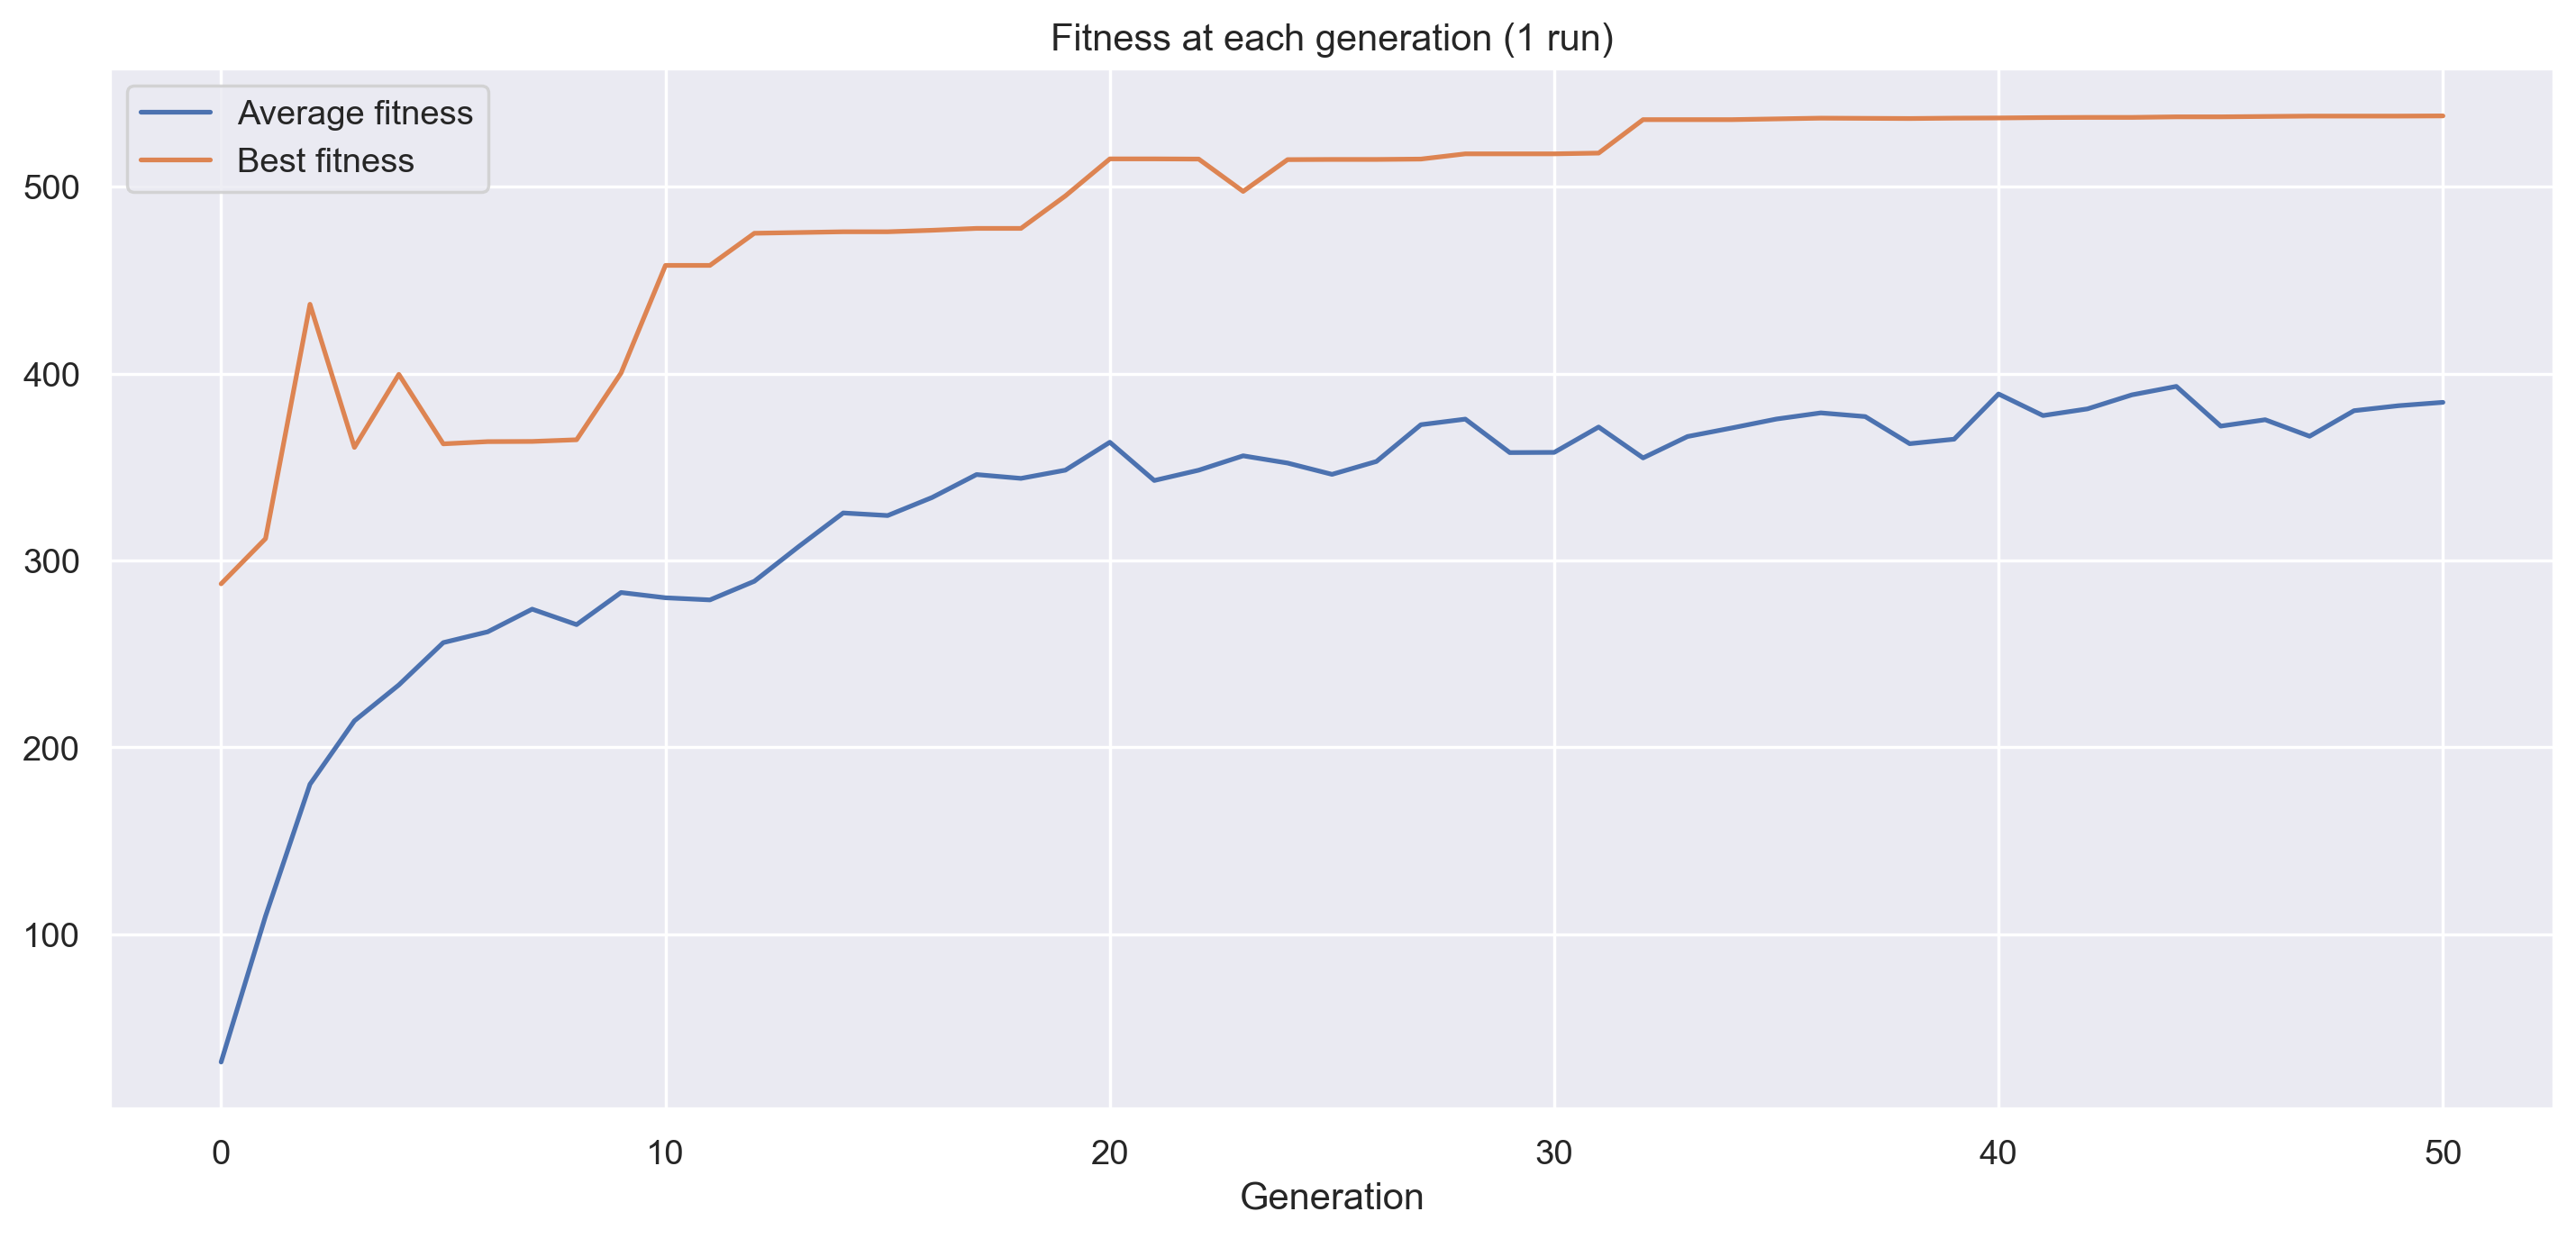

In [4]:
fig, ax = plt.subplots(dpi=250, figsize=(14, 6))
avg_fitness = outputs_1[0]["logbook"].select("avg")
best_fitness = outputs_1[0]["logbook"].select("max")
ax.plot(avg_fitness, label="Average fitness")
ax.plot(best_fitness, label="Best fitness")
ax.set_title("Fitness at each generation (1 run)")
ax.set_xlabel("Generation")
ax.legend()
fig.savefig("plots/exercise-1-fitness.png", bbox_inches="tight")

## Exercise 2

In [5]:
crossover_ops=[
    {"function": tools.cxTwoPoint},
    {"function": tools.cxOrdered},
]
mutation_ops=[
    {"function": tools.mutFlipBit, "indpb": 0.1},
    {"function": tools.mutShuffleIndexes, "indpb": 0.1},
]
selection_ops=[
    {"function": tools.selTournament, "tournsize": 5},
    {"function": tools.selRoulette},
]

outputs_2 = run_petrinas_ga(
    dataset=dataset,
    n_places=N_PLACES,
    n_transitions=N_TRANSITIONS,
    weight=WEIGHT,
    crossover_ops=crossover_ops,
    mutation_ops=mutation_ops,
    selection_ops=selection_ops,
    crossover_probs=[0.5],
    mutation_probs=[0.5],
    n_individuals=500,
    n_generations=50,
    n_iterations=30,
)

save_outputs(outputs_2, "outputs/exercise-2.json")

Crossover op: cxTwoPoint
Mutation op: mutFlipBit
Selection op: selTournament
Crossover prob: 0.5
Mutation prob: 0.5


100%|██████████| 30/30 [04:41<00:00,  9.37s/it]


Best fitness: 539.4000000000001
Average best fitness: 499.23000000000013

Crossover op: cxTwoPoint
Mutation op: mutFlipBit
Selection op: selRoulette
Crossover prob: 0.5
Mutation prob: 0.5


100%|██████████| 30/30 [04:14<00:00,  8.47s/it]


Best fitness: 515.1
Average best fitness: 437.68000000000006

Crossover op: cxTwoPoint
Mutation op: mutShuffleIndexes
Selection op: selTournament
Crossover prob: 0.5
Mutation prob: 0.5


100%|██████████| 30/30 [05:09<00:00, 10.32s/it]


Best fitness: 539.6
Average best fitness: 538.4566666666668

Crossover op: cxTwoPoint
Mutation op: mutShuffleIndexes
Selection op: selRoulette
Crossover prob: 0.5
Mutation prob: 0.5


100%|██████████| 30/30 [04:28<00:00,  8.94s/it]


Best fitness: 533.6
Average best fitness: 519.4466666666666

Crossover op: cxOrdered
Mutation op: mutFlipBit
Selection op: selTournament
Crossover prob: 0.5
Mutation prob: 0.5


100%|██████████| 30/30 [05:05<00:00, 10.19s/it]


Best fitness: 539.7
Average best fitness: 517.3166666666668

Crossover op: cxOrdered
Mutation op: mutFlipBit
Selection op: selRoulette
Crossover prob: 0.5
Mutation prob: 0.5


100%|██████████| 30/30 [04:28<00:00,  8.96s/it]


Best fitness: 532.5
Average best fitness: 437.89666666666665

Crossover op: cxOrdered
Mutation op: mutShuffleIndexes
Selection op: selTournament
Crossover prob: 0.5
Mutation prob: 0.5


100%|██████████| 30/30 [05:27<00:00, 10.93s/it]


Best fitness: 540.2
Average best fitness: 538.49

Crossover op: cxOrdered
Mutation op: mutShuffleIndexes
Selection op: selRoulette
Crossover prob: 0.5
Mutation prob: 0.5


100%|██████████| 30/30 [04:42<00:00,  9.41s/it]

Best fitness: 534.1
Average best fitness: 513.7066666666667



### Make table of performance of each combination

In [6]:
print(
    "CROSSOVER".ljust(10),
    "MUTATION".ljust(17),
    "SELECTION".ljust(13),
    "ABF".ljust(6),
    "TIME".ljust(7),
)

for crossover_op in crossover_ops:
    for mutation_op in mutation_ops:
        for selection_op in selection_ops:
            runs = [
                output for output in outputs_2
                if output["crossover_op"] == crossover_op
                and output["mutation_op"] == mutation_op
                and output["selection_op"] == selection_op
            ]

            abf = np.mean([run["best_fitness"] for run in runs])
            running_time = np.mean([run["running_time"] for run in runs])

            print(
                crossover_op["function"].__name__.ljust(10),
                mutation_op["function"].__name__.ljust(17),
                selection_op["function"].__name__.ljust(13),
                f"{abf:.5}".ljust(6),
                f"{running_time:.5}".ljust(7),
            )

CROSSOVER  MUTATION          SELECTION     ABF    TIME   
cxTwoPoint mutFlipBit        selTournament 499.23 9.3081 
cxTwoPoint mutFlipBit        selRoulette   437.68 8.4073 
cxTwoPoint mutShuffleIndexes selTournament 538.46 10.257 
cxTwoPoint mutShuffleIndexes selRoulette   519.45 8.8778 
cxOrdered  mutFlipBit        selTournament 517.32 10.125 
cxOrdered  mutFlipBit        selRoulette   437.9  8.8921 
cxOrdered  mutShuffleIndexes selTournament 538.49 10.867 
cxOrdered  mutShuffleIndexes selRoulette   513.71 9.3499 


### Make plot of ABF of each combination

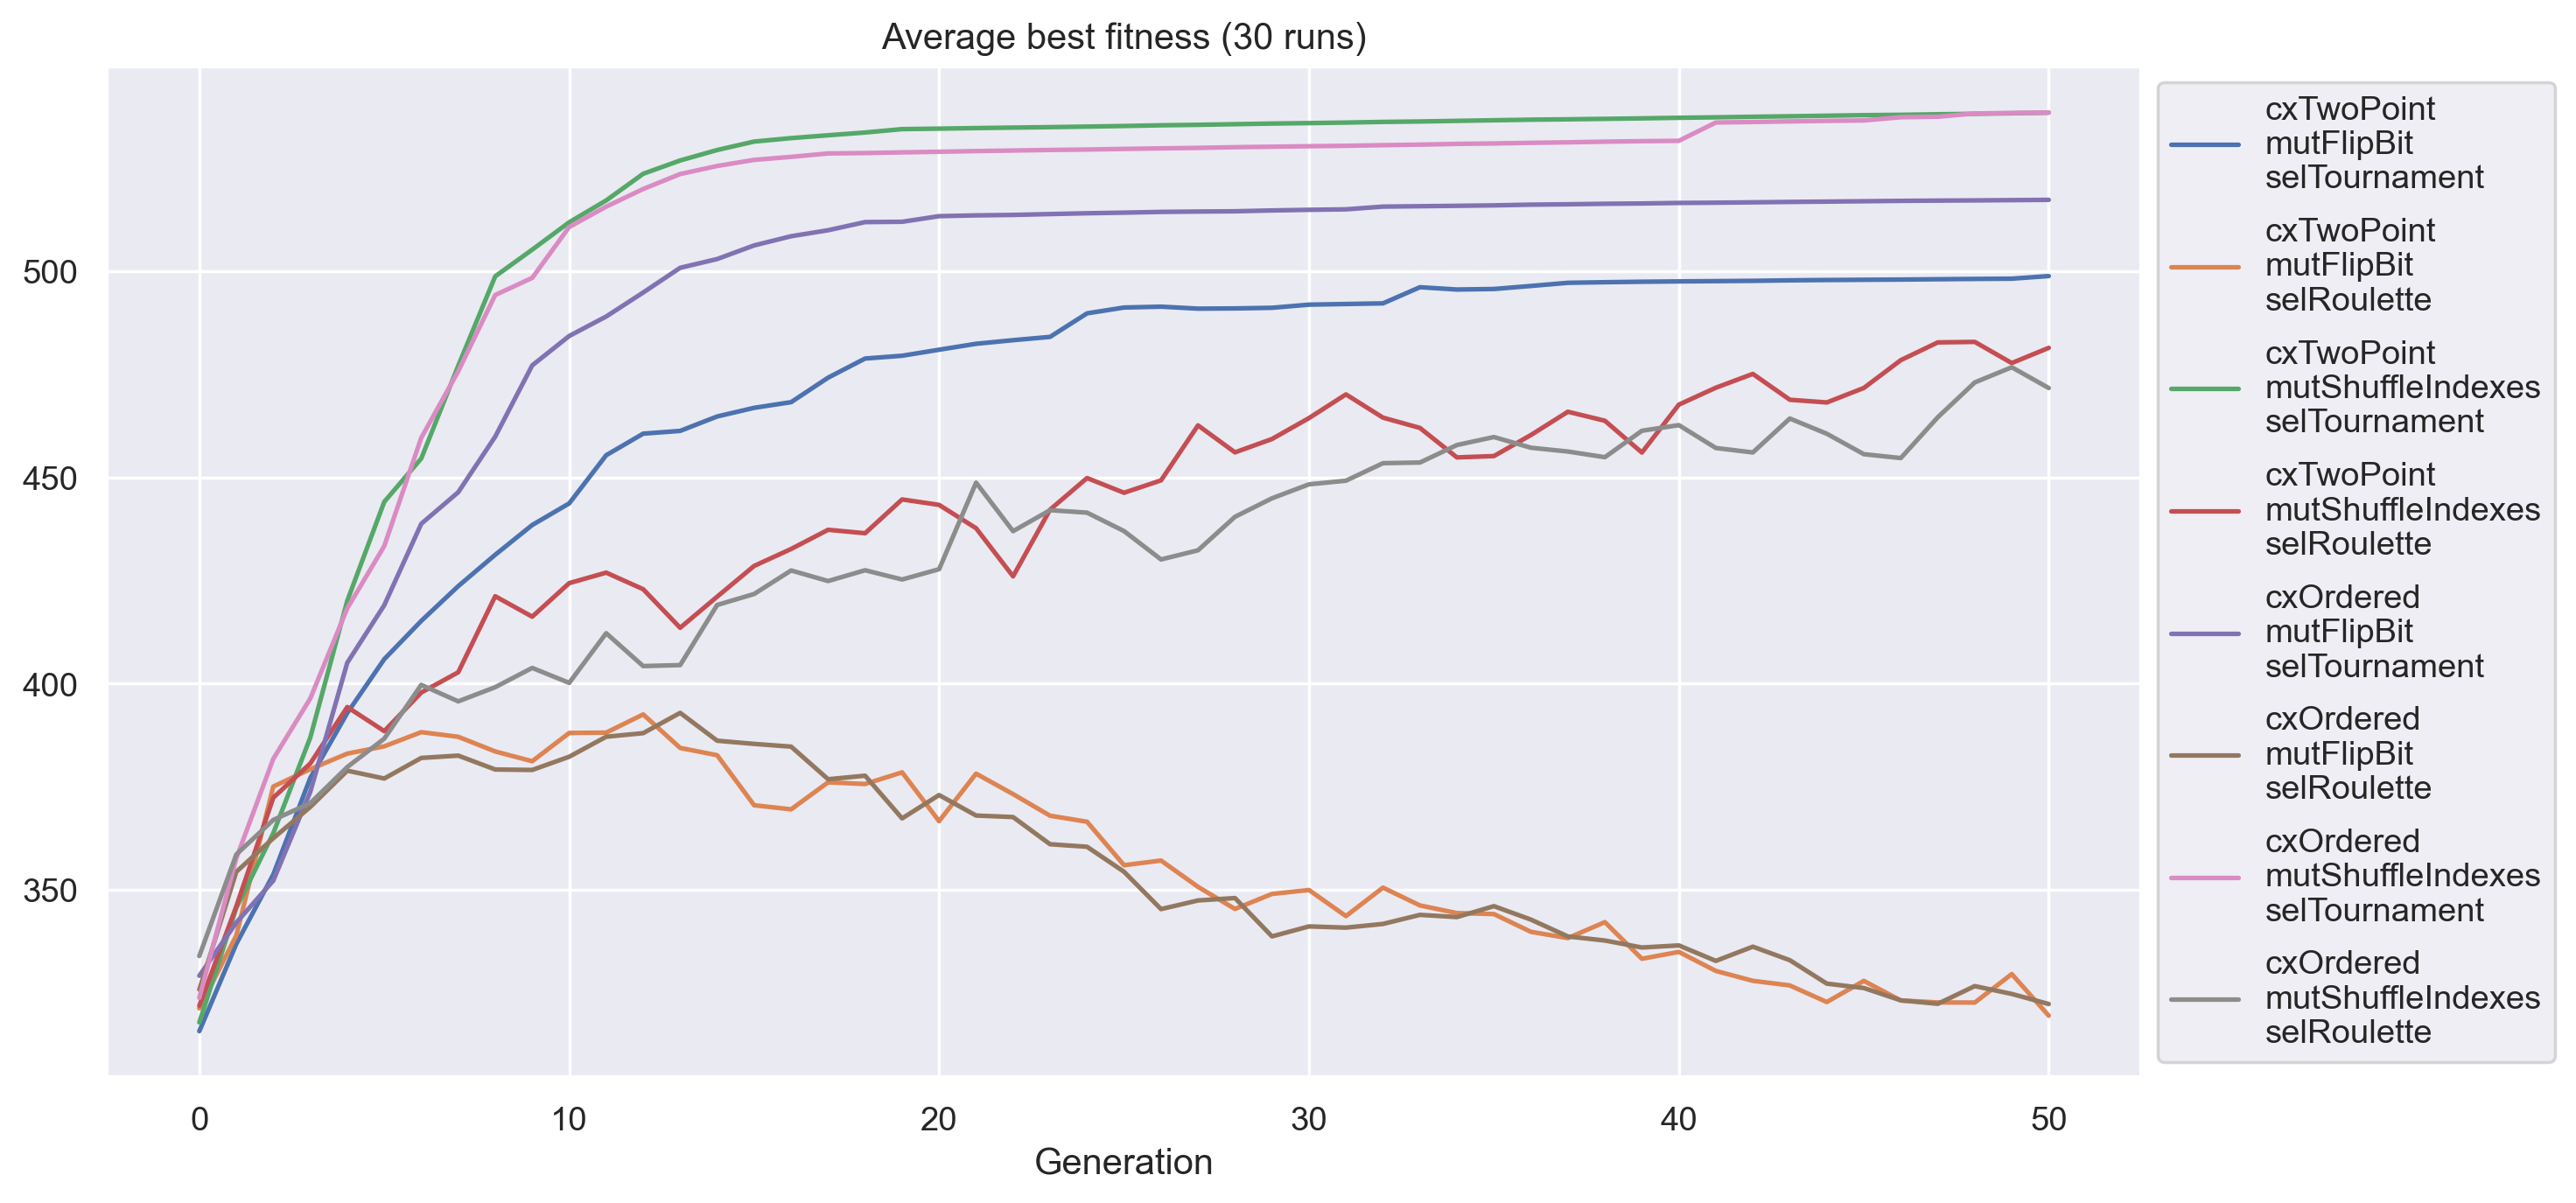

In [12]:
fig, ax = plt.subplots(dpi=250, figsize=(12, 6))
ax.set_title("Average best fitness (30 runs)")
ax.set_xlabel("Generation")

for crossover_op in crossover_ops:
    for mutation_op in mutation_ops:
        for selection_op in selection_ops:
            runs = [
                output for output in outputs_2
                if output["crossover_op"] == crossover_op
                and output["mutation_op"] == mutation_op
                and output["selection_op"] == selection_op
            ]

            best_fitness_runs = np.array([run["logbook"].select("max") for run in runs])
            abf = best_fitness_runs.mean(axis=0)

            ax.plot(
                abf, 
                label=f"{crossover_op['function'].__name__}\n{mutation_op['function'].__name__}\n{selection_op['function'].__name__}"
            )

ax.legend(loc="center left", ncols=1, bbox_to_anchor=(1, 0.5), labelspacing=0.7)
fig.savefig("plots/exercise-2-abf.png", bbox_inches="tight")

### Make boxplot of best fitness distribution of each combination

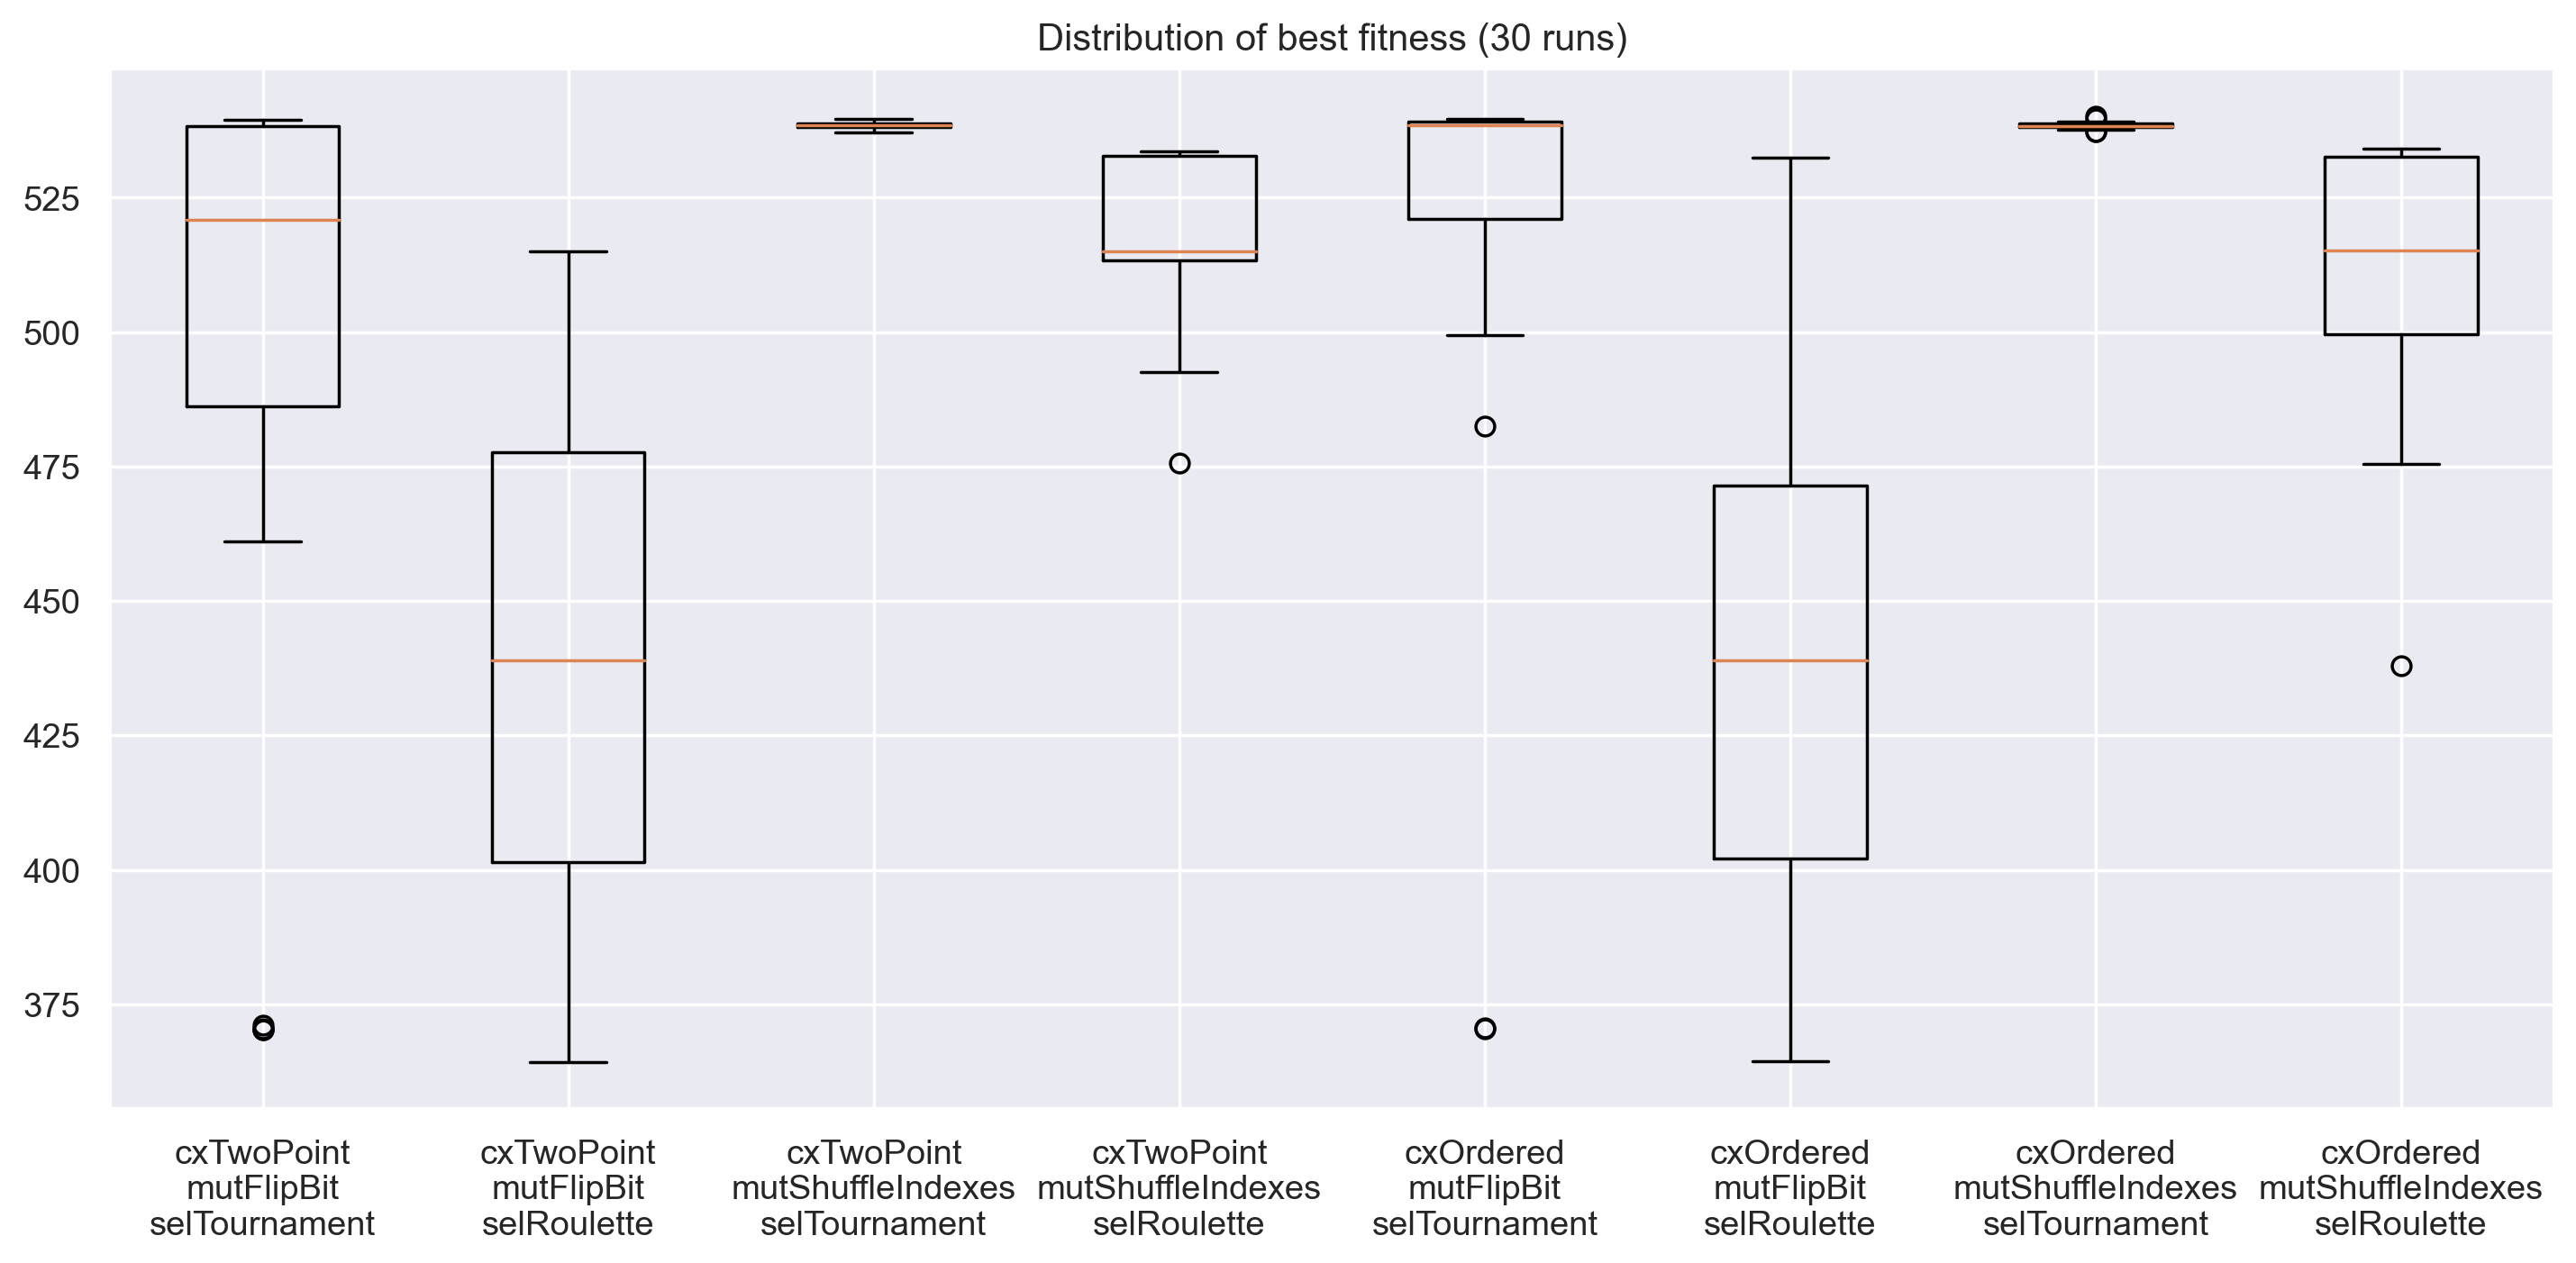

In [8]:
fig, ax = plt.subplots(dpi=250, figsize=(14, 6))
ax.set_title("Distribution of best fitness (30 runs)")

data = []
xticklabels = []

for crossover_op in crossover_ops:
    for mutation_op in mutation_ops:
        for selection_op in selection_ops:
            runs = [
                output for output in outputs_2
                if output["crossover_op"] == crossover_op
                and output["mutation_op"] == mutation_op
                and output["selection_op"] == selection_op
            ]

            data.append([run["best_fitness"] for run in runs])
            xticklabels.append(
                f"{crossover_op['function'].__name__}\n"
                f"{mutation_op['function'].__name__}\n"
                f"{selection_op['function'].__name__}"
            )

ax.boxplot(data)
ax.set_xticklabels(xticklabels)
fig.savefig("plots/exercise-2-boxplot.png", bbox_inches="tight")

## Exercise 3

In [9]:
crossover_probs = [0.2, 0.4, 0.6, 0.8]
mutation_probs = [0.2, 0.4, 0.6, 0.8]

outputs_3 = run_petrinas_ga(
    dataset=dataset,
    n_places=N_PLACES,
    n_transitions=N_TRANSITIONS,
    weight=WEIGHT,
    crossover_ops=[
        {"function": tools.cxOrdered},
    ],
    mutation_ops=[
        {"function": tools.mutShuffleIndexes, "indpb": 0.1},
    ],
    selection_ops=[
        {"function": tools.selTournament, "tournsize": 5},
    ],
    crossover_probs=crossover_probs,
    mutation_probs=mutation_probs,
    n_individuals=500,
    n_generations=50,
    n_iterations=30,
)

save_outputs(outputs_3, "outputs/exercise-3.json")

Crossover op: cxOrdered
Mutation op: mutShuffleIndexes
Selection op: selTournament
Crossover prob: 0.2
Mutation prob: 0.2


100%|██████████| 30/30 [03:12<00:00,  6.43s/it]


Best fitness: 538.6
Average best fitness: 513.19

Crossover op: cxOrdered
Mutation op: mutShuffleIndexes
Selection op: selTournament
Crossover prob: 0.2
Mutation prob: 0.4


100%|██████████| 30/30 [03:47<00:00,  7.58s/it]


Best fitness: 538.6
Average best fitness: 531.7133333333335

Crossover op: cxOrdered
Mutation op: mutShuffleIndexes
Selection op: selTournament
Crossover prob: 0.2
Mutation prob: 0.6


100%|██████████| 30/30 [04:19<00:00,  8.65s/it]


Best fitness: 538.1
Average best fitness: 536.6566666666669

Crossover op: cxOrdered
Mutation op: mutShuffleIndexes
Selection op: selTournament
Crossover prob: 0.2
Mutation prob: 0.8


100%|██████████| 30/30 [04:51<00:00,  9.73s/it]


Best fitness: 535.9000000000001
Average best fitness: 534.8233333333333

Crossover op: cxOrdered
Mutation op: mutShuffleIndexes
Selection op: selTournament
Crossover prob: 0.4
Mutation prob: 0.2


100%|██████████| 30/30 [04:40<00:00,  9.35s/it]


Best fitness: 539.0
Average best fitness: 532.4533333333334

Crossover op: cxOrdered
Mutation op: mutShuffleIndexes
Selection op: selTournament
Crossover prob: 0.4
Mutation prob: 0.4


100%|██████████| 30/30 [05:01<00:00, 10.03s/it]


Best fitness: 540.0
Average best fitness: 538.5166666666668

Crossover op: cxOrdered
Mutation op: mutShuffleIndexes
Selection op: selTournament
Crossover prob: 0.4
Mutation prob: 0.6


100%|██████████| 30/30 [05:13<00:00, 10.46s/it]


Best fitness: 539.7
Average best fitness: 537.8033333333334

Crossover op: cxOrdered
Mutation op: mutShuffleIndexes
Selection op: selTournament
Crossover prob: 0.4
Mutation prob: 0.8


100%|██████████| 30/30 [05:17<00:00, 10.57s/it]


Best fitness: 537.7
Average best fitness: 535.0000000000001

Crossover op: cxOrdered
Mutation op: mutShuffleIndexes
Selection op: selTournament
Crossover prob: 0.6
Mutation prob: 0.2


100%|██████████| 30/30 [06:09<00:00, 12.33s/it]


Best fitness: 540.3000000000001
Average best fitness: 535.58

Crossover op: cxOrdered
Mutation op: mutShuffleIndexes
Selection op: selTournament
Crossover prob: 0.6
Mutation prob: 0.4


100%|██████████| 30/30 [05:59<00:00, 11.99s/it]


Best fitness: 540.0
Average best fitness: 539.2400000000001

Crossover op: cxOrdered
Mutation op: mutShuffleIndexes
Selection op: selTournament
Crossover prob: 0.6
Mutation prob: 0.6


100%|██████████| 30/30 [05:43<00:00, 11.44s/it]


Best fitness: 539.7
Average best fitness: 534.9166666666665

Crossover op: cxOrdered
Mutation op: mutShuffleIndexes
Selection op: selTournament
Crossover prob: 0.6
Mutation prob: 0.8


100%|██████████| 30/30 [05:44<00:00, 11.49s/it]


Best fitness: 540.7
Average best fitness: 535.0366666666667

Crossover op: cxOrdered
Mutation op: mutShuffleIndexes
Selection op: selTournament
Crossover prob: 0.8
Mutation prob: 0.2


100%|██████████| 30/30 [07:39<00:00, 15.32s/it]


Best fitness: 540.5
Average best fitness: 539.5633333333333

Crossover op: cxOrdered
Mutation op: mutShuffleIndexes
Selection op: selTournament
Crossover prob: 0.8
Mutation prob: 0.4


100%|██████████| 30/30 [07:01<00:00, 14.06s/it]


Best fitness: 540.0
Average best fitness: 539.4500000000002

Crossover op: cxOrdered
Mutation op: mutShuffleIndexes
Selection op: selTournament
Crossover prob: 0.8
Mutation prob: 0.6


100%|██████████| 30/30 [06:26<00:00, 12.88s/it]


Best fitness: 539.2
Average best fitness: 538.4533333333334

Crossover op: cxOrdered
Mutation op: mutShuffleIndexes
Selection op: selTournament
Crossover prob: 0.8
Mutation prob: 0.8


100%|██████████| 30/30 [05:52<00:00, 11.76s/it]

Best fitness: 535.5
Average best fitness: 534.73



### Make table of performance of each combination

In [19]:
print(
    "P_C".ljust(4),
    "P_M".ljust(4),
    "ABF".ljust(6),
    "TIME".ljust(7),
)

for crossover_prob in crossover_probs:
    for mutation_prob in mutation_probs:
        runs = [
            output for output in outputs_3
            if output["crossover_prob"] == crossover_prob
            and output["mutation_prob"] == mutation_prob
        ]

        abf = np.mean([run["best_fitness"] for run in runs])
        running_time = np.mean([run["running_time"] for run in runs])

        print(
            str(crossover_prob).ljust(4),
            str(mutation_prob).ljust(4),
            f"{abf:.5}".ljust(6),
            f"{running_time:.5}".ljust(7),
        )

P_C  P_M  ABF    TIME   
0.2  0.2  513.19 6.3647 
0.2  0.4  531.71 7.5139 
0.2  0.6  536.66 8.5834 
0.2  0.8  534.82 9.6689 
0.4  0.2  532.45 9.2902 
0.4  0.4  538.52 9.9707 
0.4  0.6  537.8  10.394 
0.4  0.8  535.0  10.51  
0.6  0.2  535.58 12.268 
0.6  0.4  539.24 11.927 
0.6  0.6  534.92 11.378 
0.6  0.8  535.04 11.426 
0.8  0.2  539.56 15.258 
0.8  0.4  539.45 14.0   
0.8  0.6  538.45 12.817 
0.8  0.8  534.73 11.696 


### Make plot of ABF of each combination

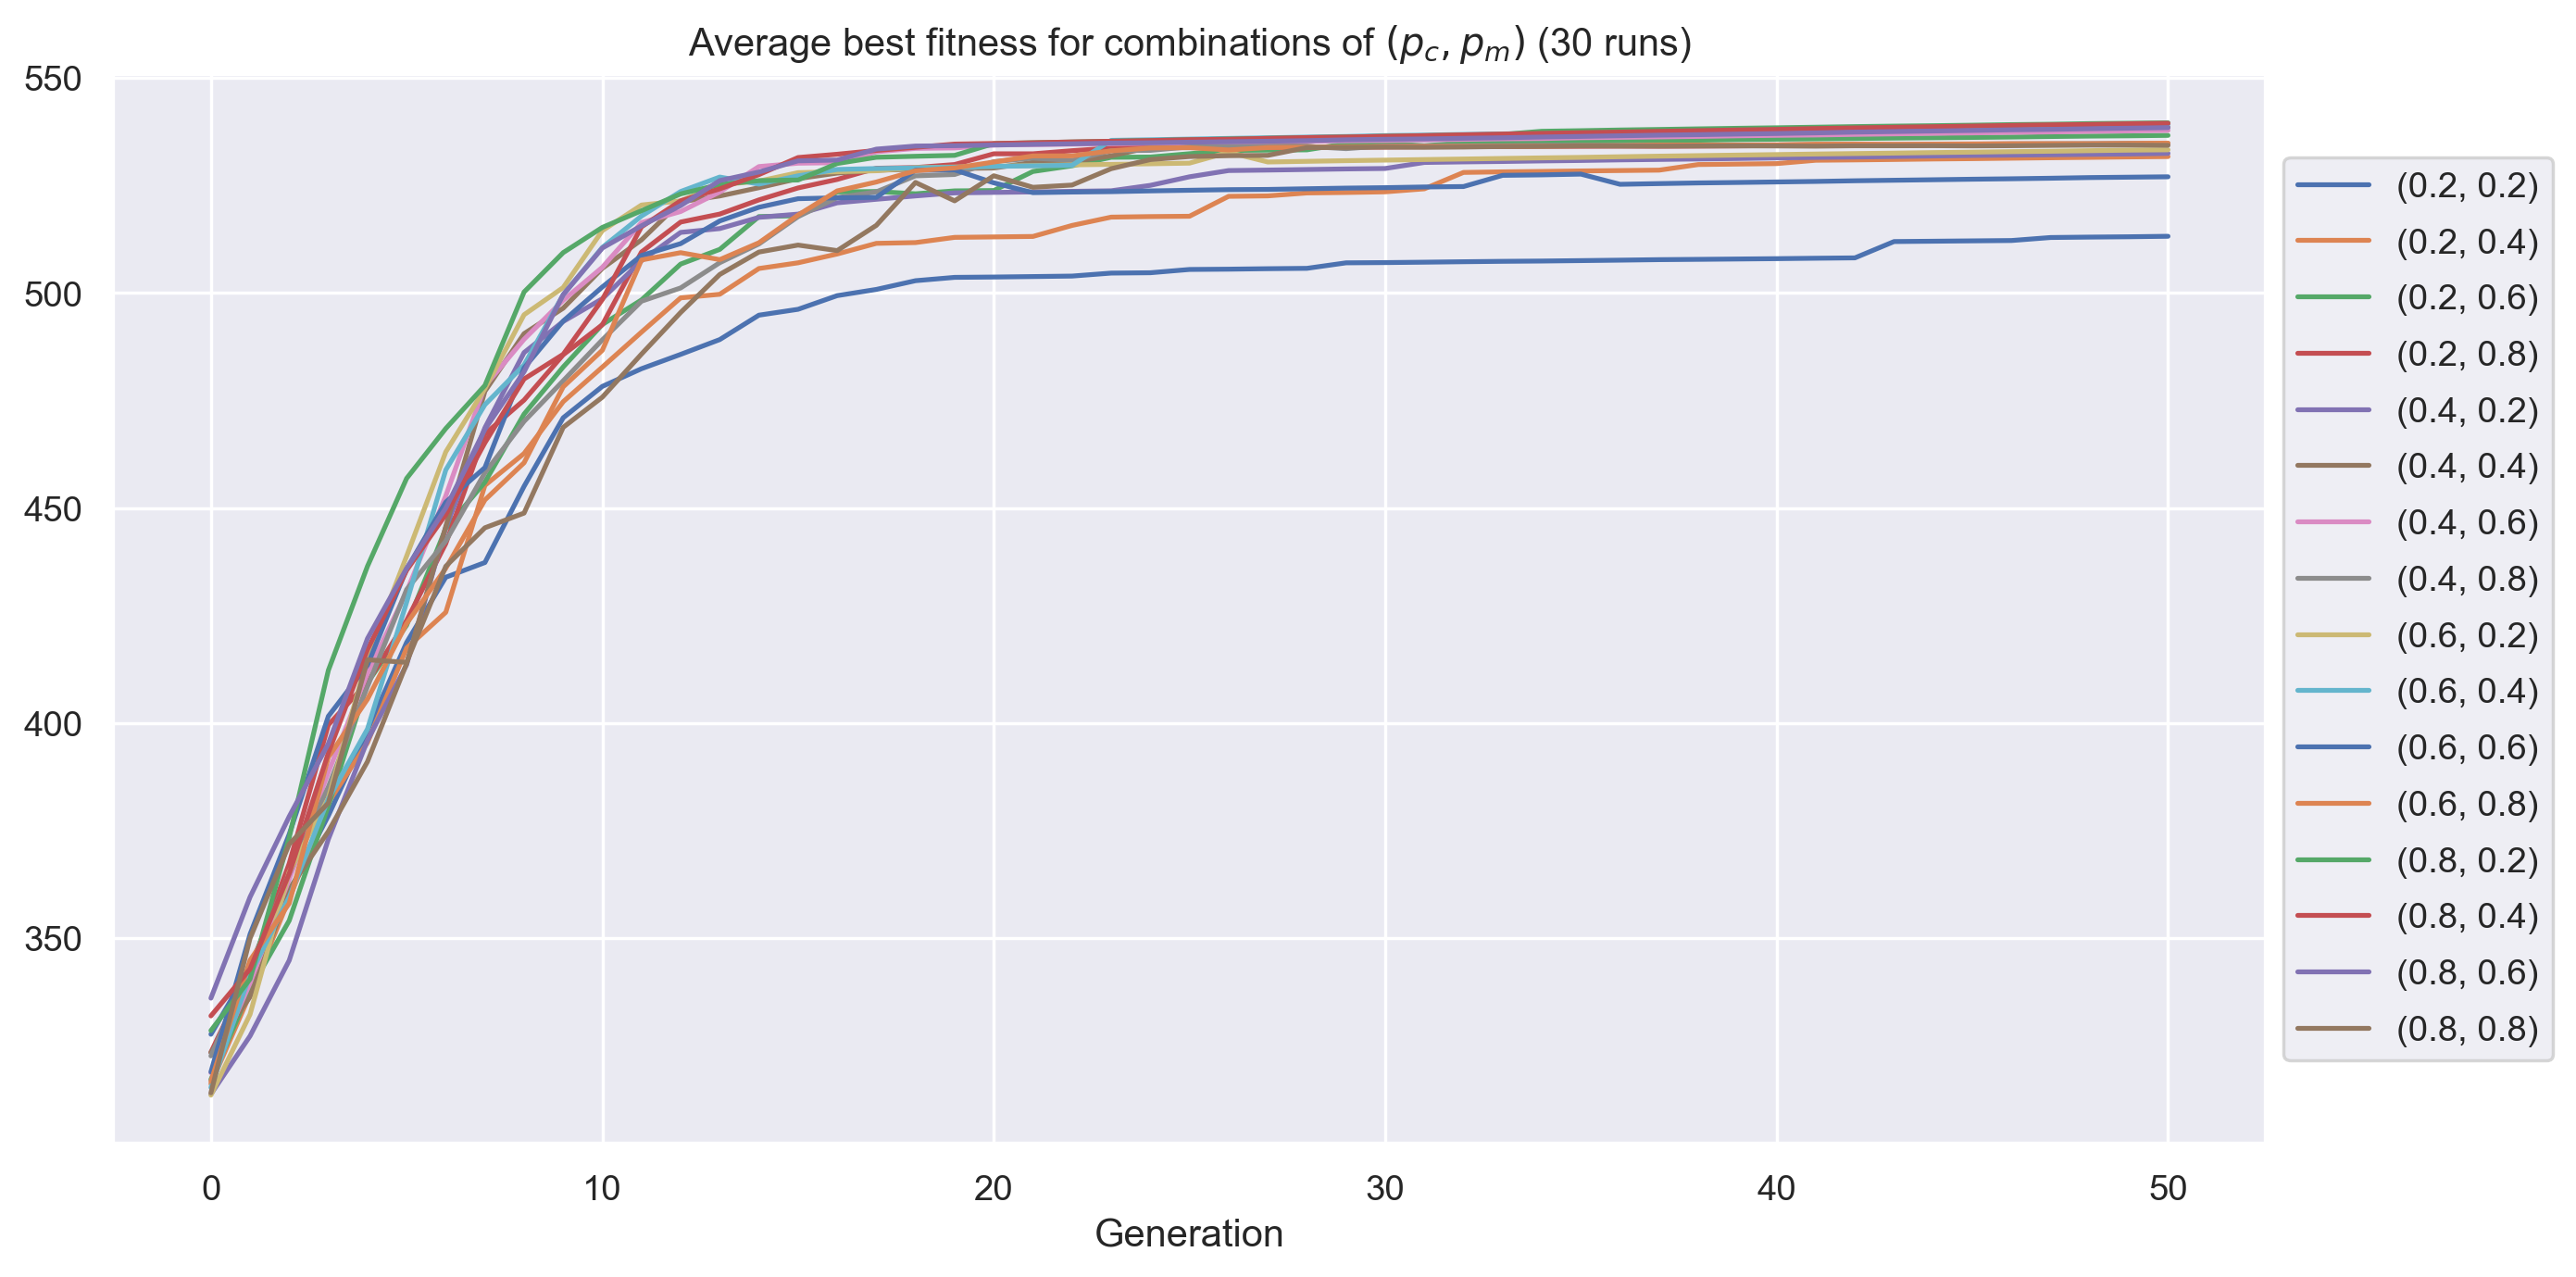

In [18]:
fig, ax = plt.subplots(dpi=250, figsize=(12, 6))
ax.set_title("Average best fitness for combinations of $(p_c, p_m)$ (30 runs)")
ax.set_xlabel("Generation")

for crossover_prob in crossover_probs:
    for mutation_prob in mutation_probs:
        runs = [
            output for output in outputs_3
            if output["crossover_prob"] == crossover_prob
            and output["mutation_prob"] == mutation_prob
        ]

        best_fitness_runs = np.array([run["logbook"].select("max") for run in runs])
        abf = best_fitness_runs.mean(axis=0)

        ax.plot(abf, label=f"({crossover_prob}, {mutation_prob})")

ax.legend(loc="center left", ncols=1, bbox_to_anchor=(1, 0.5), labelspacing=0.7)
fig.savefig("plots/exercise-3-abf.png", bbox_inches="tight")

### Make boxplot of best fitness value of each combination

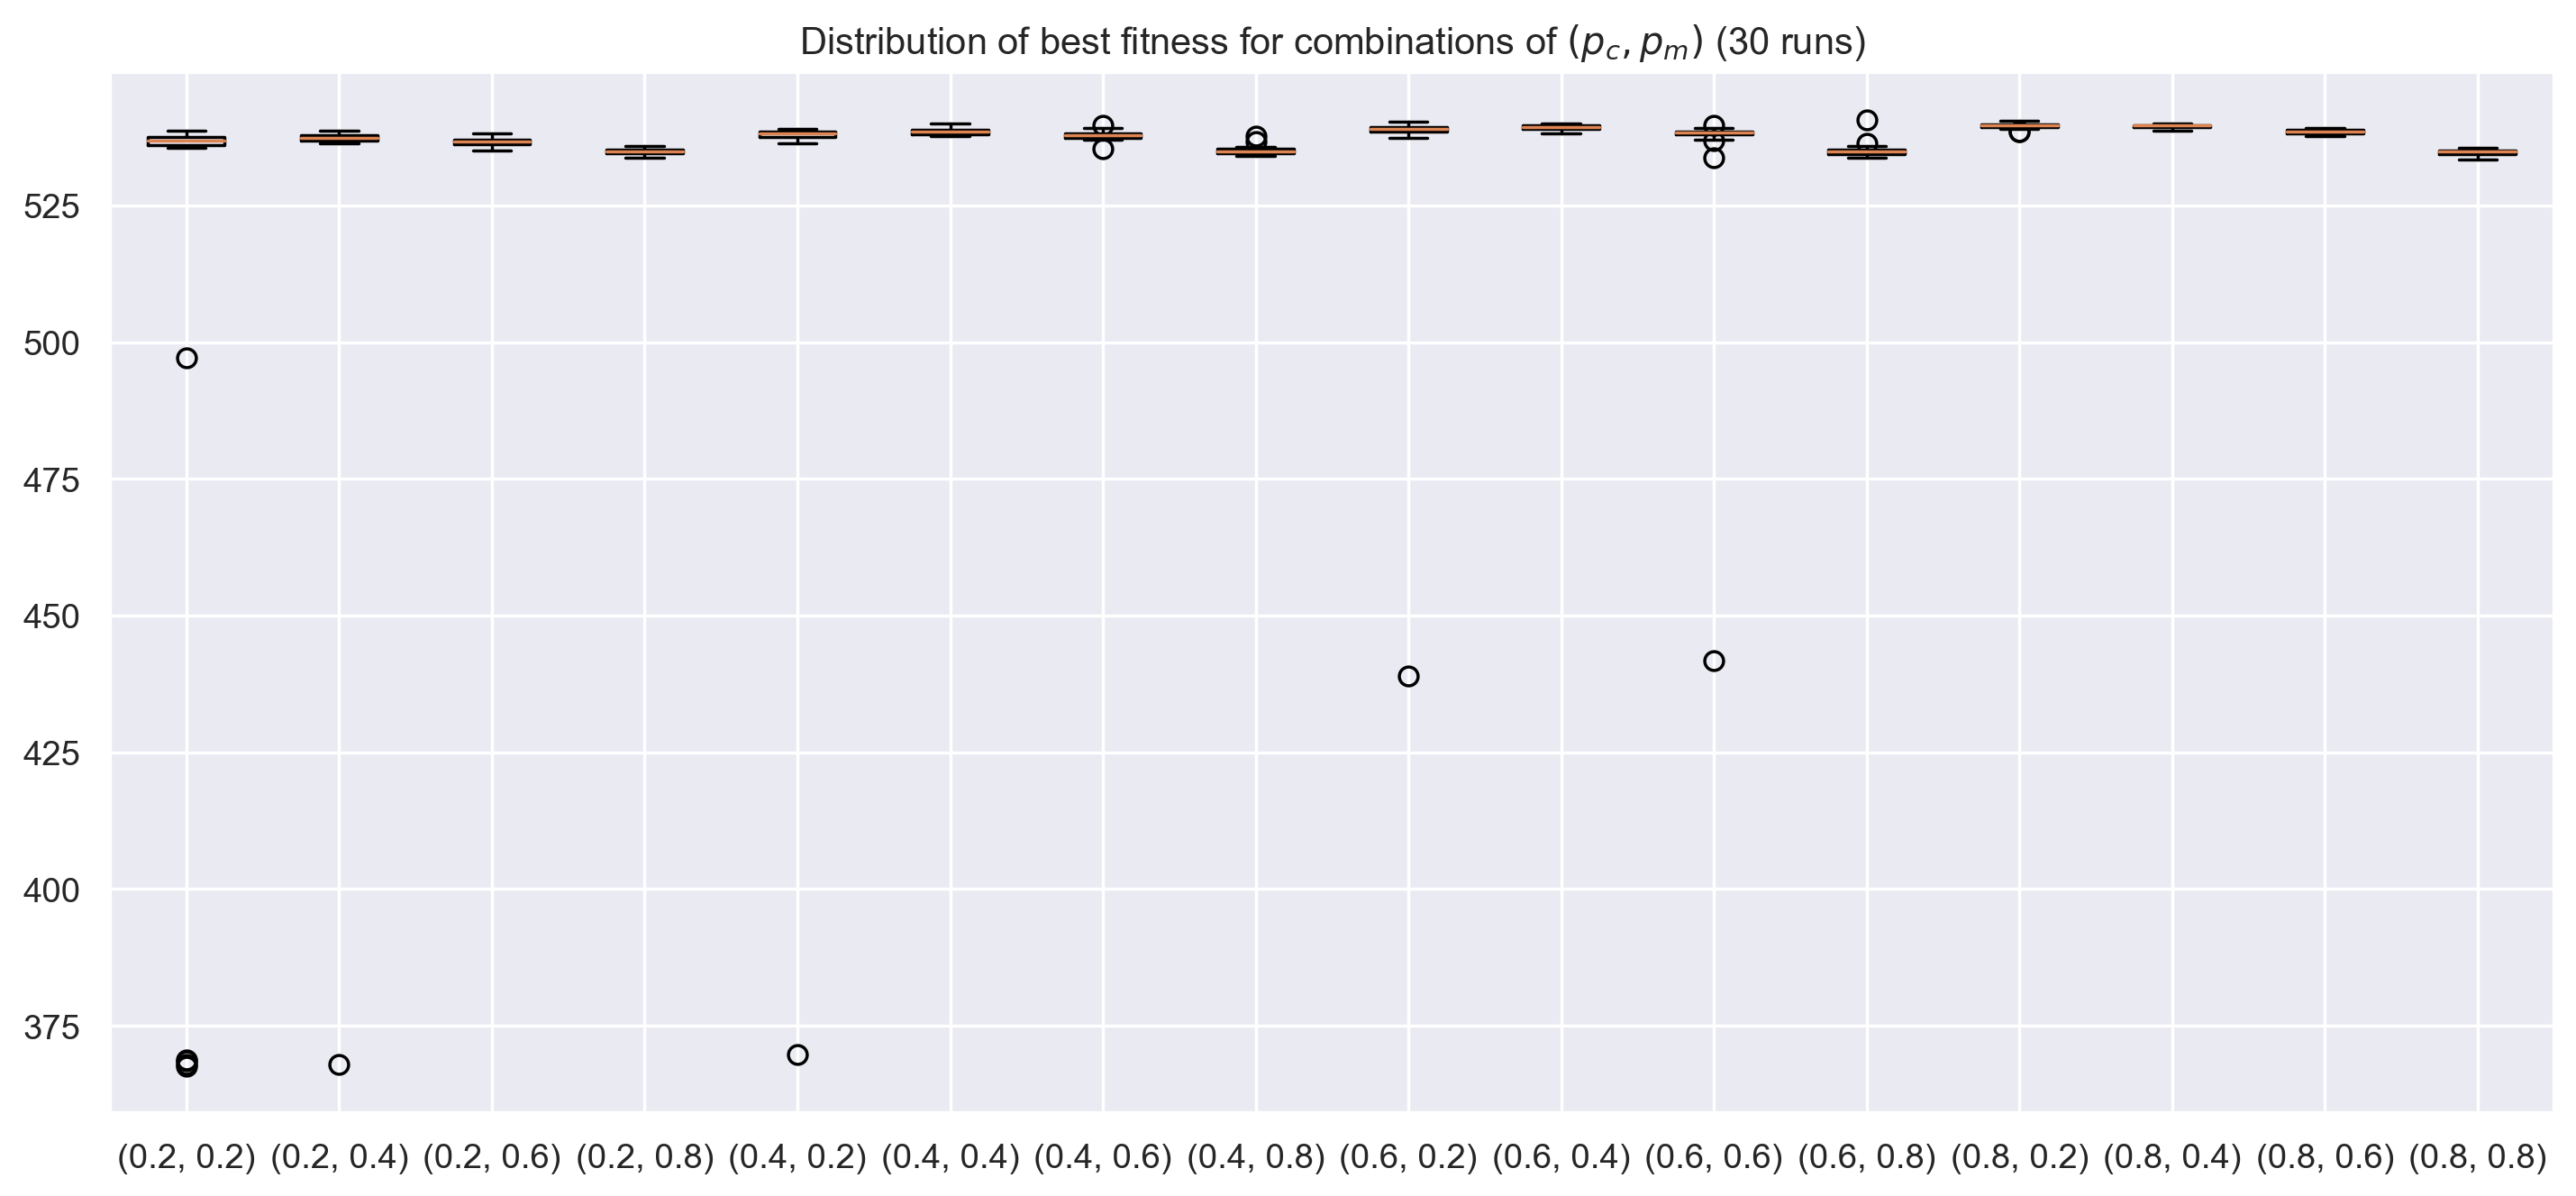

In [17]:
fig, ax = plt.subplots(dpi=250, figsize=(14, 6))
ax.set_title("Distribution of best fitness for combinations of $(p_c, p_m)$ (30 runs)")

data = []
xticklabels = []

for crossover_prob in crossover_probs:
    for mutation_prob in mutation_probs:
            runs = [
                output for output in outputs_3
                if output["crossover_prob"] == crossover_prob
                and output["mutation_prob"] == mutation_prob
            ]

            data.append([run["best_fitness"] for run in runs])
            xticklabels.append(f"({crossover_prob}, {mutation_prob})")

ax.boxplot(data)
ax.set_xticklabels(xticklabels)
fig.savefig("plots/exercise-3-boxplot.png", bbox_inches="tight")